In [18]:
import os
# print(os.chdir(''))

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

warnings.filterwarnings("ignore")

In [2]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

analyte1 = pd.read_csv('../data/Interpolated_Analyte1.csv')
analyte2 = pd.read_csv('../data/Analyte2.csv')
analyte3 = pd.read_csv('../data/Analyte3.csv')

analyte1.head(10)

,CFU/mL,Sensor2,Sensor1,Sensor3
0,0.000000e+00,-65.500000,-183.780000,-68.340000
1,6.224490e+05,-1.618680,-99.467347,-5.432585
2,1.244898e+06,11.658417,-98.501361,4.327052
3,1.867347e+06,24.935515,-97.535374,14.086689
4,2.489796e+06,38.212612,-96.569388,23.846327
5,3.112245e+06,50.208649,-95.637234,32.674989
6,3.734694e+06,50.675134,-95.009569,33.124875
7,4.357143e+06,51.141619,-94.381905,33.574762
8,4.979592e+06,51.608104,-93.754240,34.024649
9,5.602041e+06,52.074590,-93.126576,34.474535


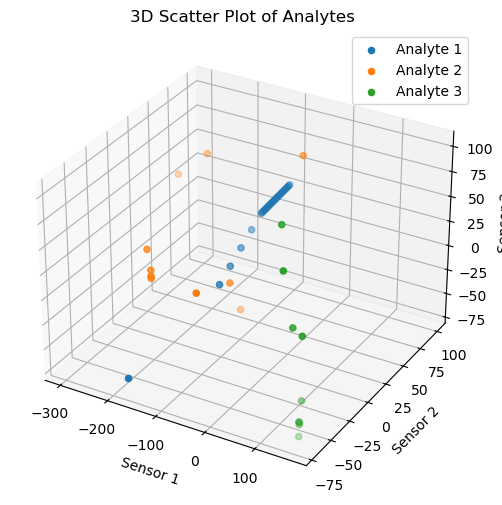

In [4]:
fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['Sensor1'], analyte1['Sensor2'], analyte1['Sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['Sensor1'], analyte2['Sensor2'], analyte2['Sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['Sensor1'], analyte3['Sensor2'], analyte3['Sensor3'], label='Analyte 3')

ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()
plt.show()


## Analyte 1

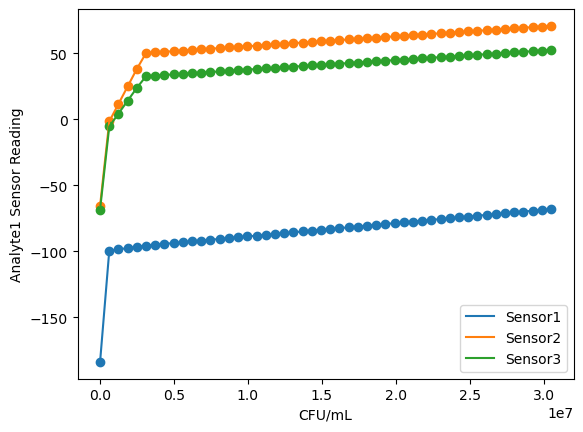

In [7]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte1 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte1.png')
plt.show()

## Analyte 2

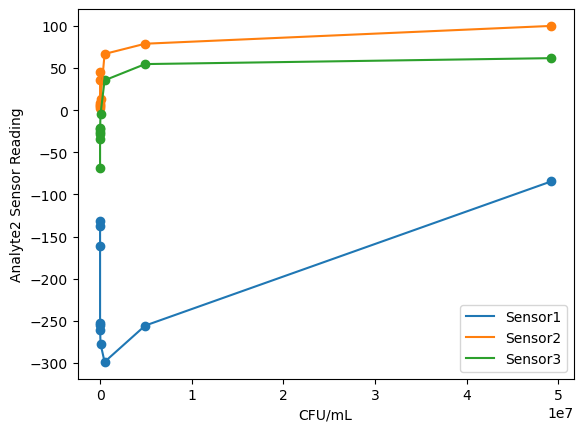

In [9]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte2 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte2.png')
plt.show()

## Analyte 3

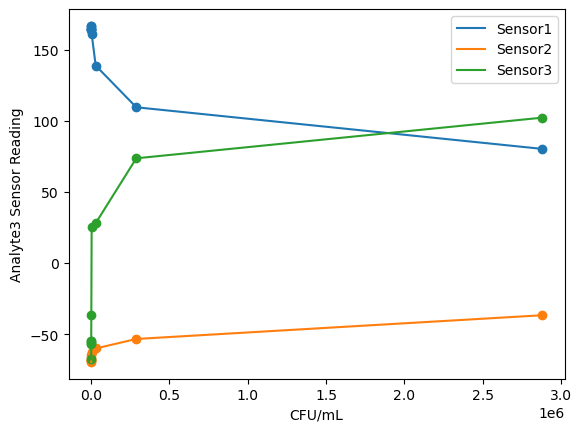

In [10]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte3 Sensor Reading')
plt.legend()
plt.savefig('../docs/plots/analyte3.png')
plt.show()

## Clustering of PCA  

In [12]:
pca = PCA(n_components=2)
pca_analyte1 = pca.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte2 = pca.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte3 = pca.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']])

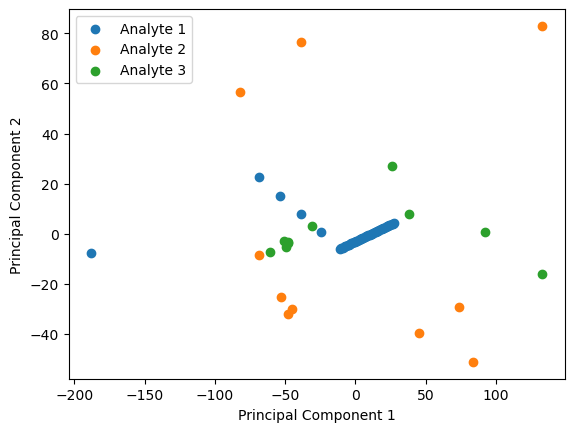

In [13]:
plt.scatter(pca_analyte1[:,0], pca_analyte1[:,1], label='Analyte 1')
plt.scatter(pca_analyte2[:,0], pca_analyte2[:,1], label='Analyte 2')
plt.scatter(pca_analyte3[:,0], pca_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('../docs/plots/pca.png')

plt.show()

## Clustering of ICA

In [19]:
ica = ICA(n_components=2)
ica_analyte1 = ica.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']], analyte1['CFU/mL'].ravel())

ica = ICA(n_components=2)
ica_analyte2 = ica.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']], analyte2['CFU/mL'].ravel())

ica = ICA(n_components=2)
ica_analyte3 = ica.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']], analyte3['CFU/mL'].ravel())

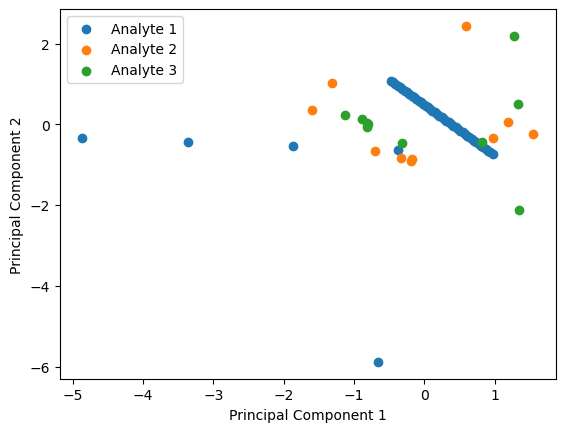

In [20]:
plt.scatter(ica_analyte1[:,0], ica_analyte1[:,1], label='Analyte 1')
plt.scatter(ica_analyte2[:,0], ica_analyte2[:,1], label='Analyte 2')
plt.scatter(ica_analyte3[:,0], ica_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('../docs/plots/ica.png')

plt.show()